Final Project with Python

Refael Frances Havergal Sibarani

In [1]:
%pip install pandas
import pandas as pd


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('Employers_data.csv')

In [3]:
# Melihat 5 data teratas
print(display(df.head()))

# Melihat info dan tipe data
print('Informasi Data', df.info())

# Melihat missing value
print('Nilai hilang:,', df.isnull().sum())

# Melihat data duplikat
print('Data duplikat:', df.duplicated().sum())

# Melihat deskripsi statistik
print('Deskripsi statistik', df.describe())

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


None
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Employee_ID       10000 non-null  int64
 1   Name              10000 non-null  str  
 2   Age               10000 non-null  int64
 3   Gender            10000 non-null  str  
 4   Department        10000 non-null  str  
 5   Job_Title         10000 non-null  str  
 6   Experience_Years  10000 non-null  int64
 7   Education_Level   10000 non-null  str  
 8   Location          10000 non-null  str  
 9   Salary            10000 non-null  int64
dtypes: int64(4), str(6)
memory usage: 781.4 KB
Informasi Data None
Nilai hilang:, Employee_ID         0
Name                0
Age                 0
Gender              0
Department          0
Job_Title           0
Experience_Years    0
Education_Level     0
Location            0
Salary              0
dtype: int64
Data duplikat: 0
Deskripsi statistik      

In [4]:
# Membersihkan spasi berlebih pada kolom teks 
for col in df.select_dtypes(include=['object', 'string']).columns:
    df[col] = df[col].str.strip()
print(df)

      Employee_ID            Name  Age  Gender   Department  Job_Title  \
0               1    Merle Ingram   24  Female  Engineering   Engineer   
1               2      John Mayes   56    Male        Sales  Executive   
2               3    Carlos Wille   21    Male  Engineering     Intern   
3               4  Michael Bryant   30    Male      Finance    Analyst   
4               5   Paula Douglas   25  Female           HR    Analyst   
...           ...             ...  ...     ...          ...        ...   
9995         9996   Thomas Rossin   51    Male        Sales  Executive   
9996         9997   Christie King   36  Female        Sales  Executive   
9997         9998   Alfred Keller   57    Male        Sales  Executive   
9998         9999  Margaret Gomez   37  Female  Engineering    Manager   
9999        10000   Joan Sorensen   25  Female        Sales    Analyst   

      Experience_Years Education_Level       Location  Salary  
0                    1          Master         

In [5]:
# pembersihan invalid data jika experience > age % & age harus > 18 dan <100 serta salary > 50
df = df[
    (df['Experience_Years'] <= df['Age']) &
    (df['Age'] >= 18) &
    (df['Age'] <= 100) &
    (df['Salary'] >= 50)
]

In [6]:
# Mengubah format teks menjadi title case atau kapital pada setiap data
for col in ['Name', 'Gender', 'Department', 'Job_Title', 'Education_Level', 'Location']:
    df[col] = df[col].str.title()

In [7]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Menghitung range untuk variabel numerik
ranges = {}
for col in ['Age', 'Experience_Years', 'Salary'] :
    ranges[col] = df[col].max() - df[col].min()
print(ranges)

{'Age': np.int64(39), 'Experience_Years': np.int64(37), 'Salary': np.int64(190000)}


In [10]:
# Menghitung Interquartile untuk mengetahui penyebaran antara titik data tengah (median) dan titik data bawah (Q1) serta titik data atas (Q3)
summary = {}
for col in ['Age', 'Experience_Years', 'Salary']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    summary[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": Q1 - 1.5 * IQR,
        "Upper Bound": Q3 + 1.5 * IQR
    }

# Meanmpilkan hasil dalam bentuk data frame
summary_df = pd.DataFrame(summary).T
print(summary_df)

                       Q1        Q3      IQR  Lower Bound  Upper Bound
Age                  27.0      43.0     16.0          3.0         67.0
Experience_Years      5.0      19.0     14.0        -16.0         40.0
Salary            70000.0  150000.0  80000.0     -50000.0     270000.0


Menurut saya berdasarkan variabel Age, Experience_Years, dan Salary tidak didaptkan outlier dikarenakan perbandingan (Nilai Minimum dengan Lower Bound) % (Nilai Maksimal dengan Upper Bound) tidak ada yang kurang atau lebih, sehingga titik data saling berdekatan

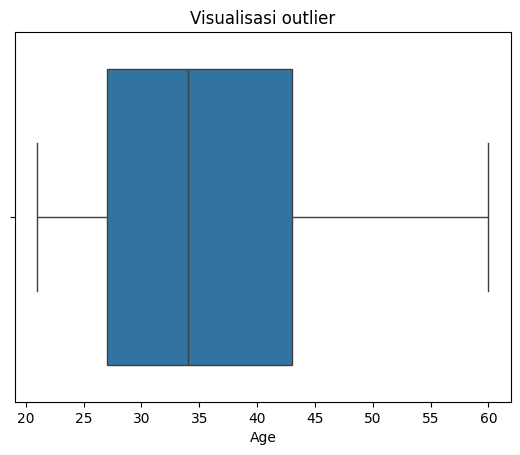

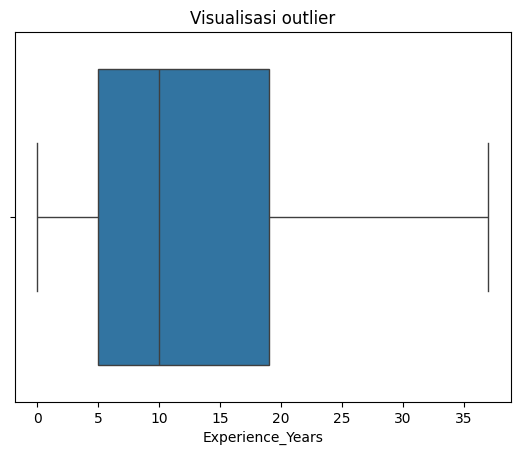

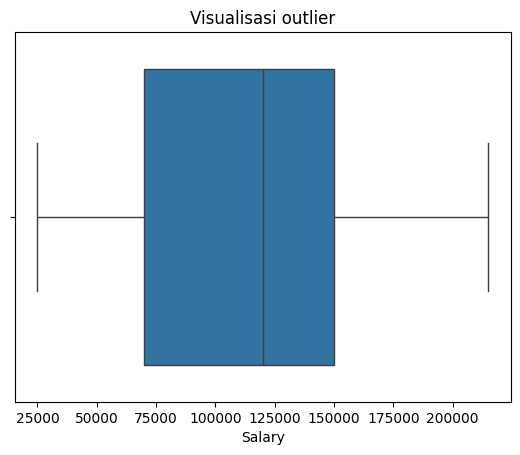

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in ['Age', 'Experience_Years', 'Salary']:
    sns.boxplot (x=df[col])
    plt.title('Visualisasi outlier')
    plt.show()

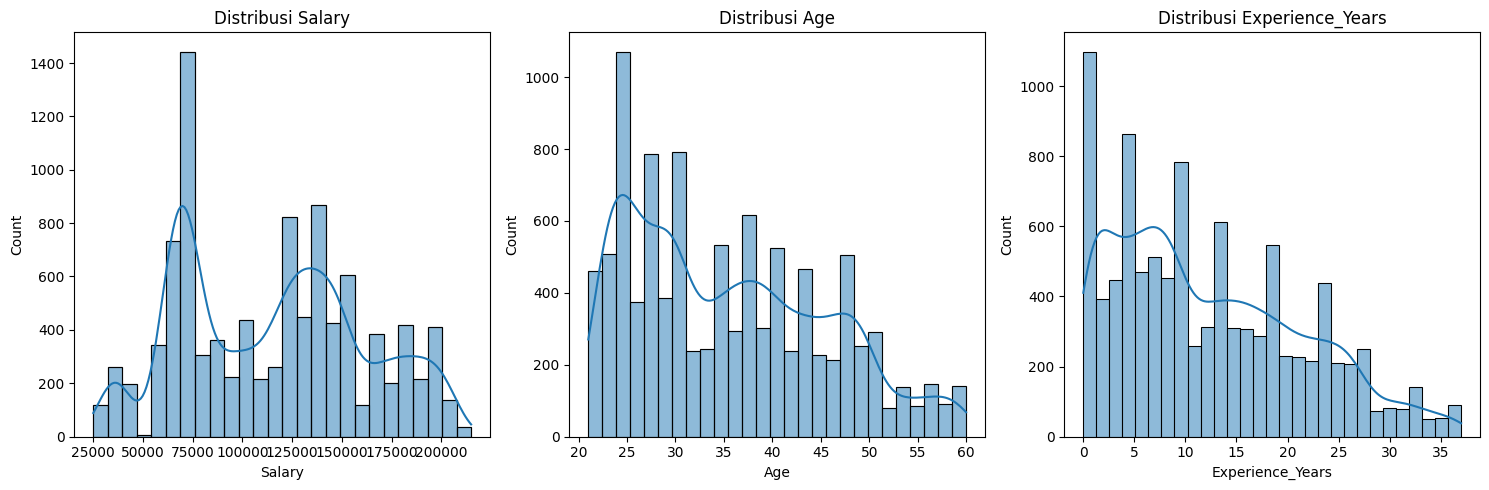

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(x=df['Salary'], kde=True, ax=axes[0])
axes[0].set_title('Distribusi Salary')

sns.histplot(x=df['Age'], kde=True, ax=axes[1])
axes[1].set_title('Distribusi Age')

sns.histplot(x=df['Experience_Years'], kde=True, ax=axes[2])
axes[2].set_title('Distribusi Experience_Years')

plt.tight_layout()
plt.show()

Perhitungan distribusi antara variabel Salary, Age , dan Experience Year penurunan line sangat condong ke kanan atau right skewed, yang artinya distribusi dengan nilai  lebih rendah sangat tinggi

In [13]:
# Pertanyaan Analisis 1: Di umur berapa intern bisa mendapatkan gaji tertinggi?
interns =df[df['Job_Title'] == 'Intern']
print(interns[['Age', 'Salary']].sort_values(by='Salary', ascending=False))

      Age  Salary
4101   24   50000
7077   25   50000
692    24   45000
8637   25   45000
9979   23   45000
...   ...     ...
1968   21   25000
8496   22   25000
8536   24   25000
4476   21   25000
4198   25   25000

[580 rows x 2 columns]


Menurun distribusi yang ada pada variabel Salary dan Age,  didapatkan umur rentang umur 24 - 25 adalah perolehan umur intern dengan gaji tertinggi

In [14]:
# Pertanyaan Analisis 2 : Departemen mana yang memiliki rata-rata gaji tertinggi?
average_salary = df.groupby('Department')['Salary'].mean().sort_values(ascending=False)
print(average_salary)

Department
Finance        130376.175549
Sales          127309.766327
Hr             126400.602410
Product        116676.334107
Marketing      101734.571600
Engineering     90680.332739
Name: Salary, dtype: float64


Berdasarkan hasil nilai rata-rata didapatkan departemen yang memiliki nilai gaji tertingi didapatkan oleh Finance dengan perolehan 130.376 dolar per tahun, disusul oleh sales dengan perolehan 127.309 dolar per tahun.

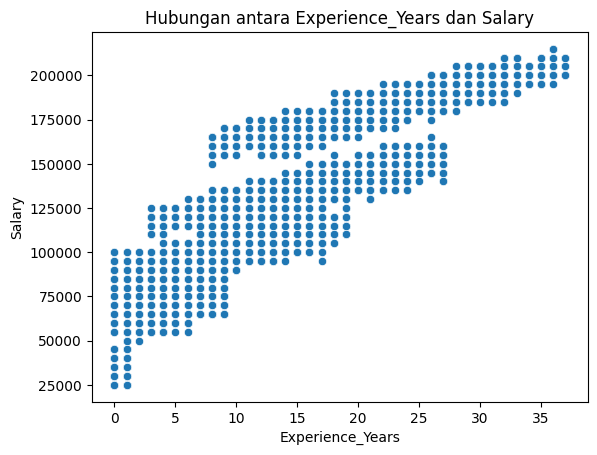

In [15]:
# Pertanyaan Analisis 3: Apakah terdapat hubungan antara pengalaman kerja dan gaji?
sns.scatterplot(x=df['Experience_Years'], y=df['Salary'])
plt.title('Hubungan antara Experience_Years dan Salary')
plt.show()

Berdasarkan scatterplot yang telah saya buat, terdapat hubungan antara Experience_Year dan Salary yang dimana semakin banyak pengalaman kerja distribusi gaji juga ikut meningkat

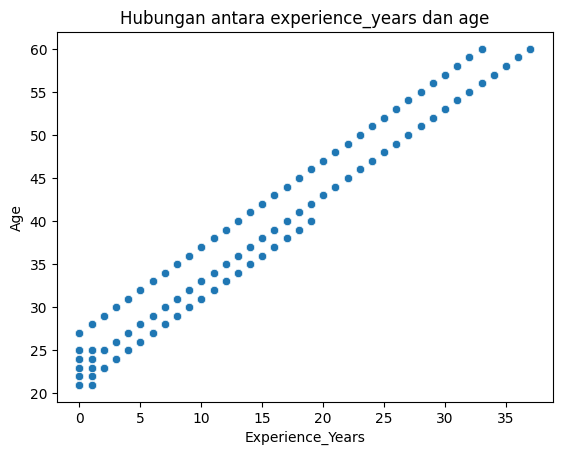

In [16]:
sns.scatterplot(x=df['Experience_Years'], y=df['Age'])
plt.title('Hubungan antara experience_years dan age')
plt.show()

Berdasarkan analisa scatterplot terdapat hubungan Experience_Years dengan Age, yaitu dimana seiring meningkatnya umur pekerja pengalaman yang didapatkan pun meningkat, kondisi tersebut menunjukkan bahwa variabel umur dan pengalaman terdistribusi normal

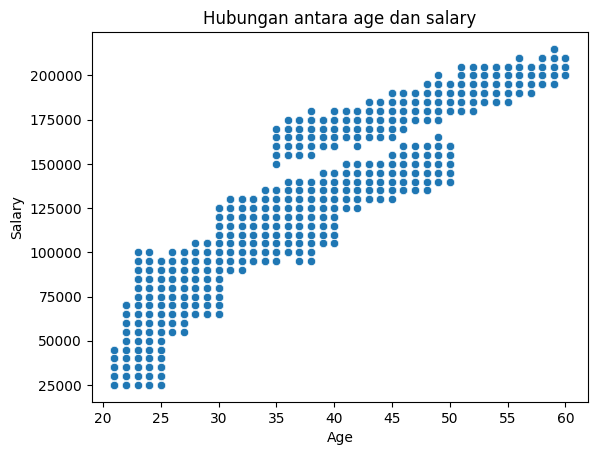

In [17]:
sns.scatterplot(x=df['Age'], y=df['Salary'])
plt.title('Hubungan antara age dan salary')
plt.show()

Menurt analisa saya distribusi tersebut terlihat normal, dikarenakan umur yang meningkat distribusi untuk pendapatan gaji tinggi, hal ini didukung oleh pengalaman kerja yang banyak yang terdapat pada variabel hubungan Experience_Years dan Age.

In [18]:
# Pertanyaan Analisis 4: Department mana yang memiliki variasi gaji terbesar?
salary_std = df.groupby('Department')['Salary'].std().sort_values(ascending=False)
print(salary_std)

Department
Sales          58246.359541
Hr             48236.961556
Finance        48111.932270
Engineering    43331.438547
Marketing      34145.560673
Product        21123.485078
Name: Salary, dtype: float64


Berdasarkan standar deviation saya mengambil kesimpulan bahwa sales menjadi nilai dengan variasi nilai tertinggi, yaitu data gaji sangat tinggi dan beragam dari nila rata -rata

In [19]:
# Pertanyaan Analisis 5: Kelompok usia mana yang paling banyak berada pada jabatan tertentu?
result = df.groupby(['Job_Title', 'Age']).size().reset_index(name='count')
result = result.loc[result.groupby('Job_Title')['count'].idxmax()]
print(result)

    Job_Title  Age  count
3     Analyst   25    353
14   Engineer   28     94
50  Executive   58     92
55     Intern   23    121
75    Manager   47    177


Berdasarkan hasil analisis saya didapatkan bahwa pekerja muda berusia 25 mendominasi posisi Analyst paling banyak dengan jumlah 353 pekerja, dan pekerja senior dengan posisi Manager dengan jumlah 177 pekerja.